What are we watching tonight Project Template

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress



In [2]:
# Read in CSV file
data_df=pd.read_csv("tv_shows.csv")

del data_df['Unnamed: 0']
del data_df['Type']
data_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [3]:
# Clean dataframe
clean_df=data_df.dropna(subset=["Age"])
clean_df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0
1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0
2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0
3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0
4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0


In [4]:
show_count={"Netflix":0, "Hulu":0, "Prime Video":0, "Disney+":0}
total_shows={"Netflix":0, "Hulu":0, "Prime Video":0, "Disney+":0}
# Loop through DataFrame
for index, row in clean_df.iterrows():
    if clean_df.loc[index, 'Netflix']==1:
            total_shows["Netflix"]+=1
    if clean_df.loc[index, 'Hulu']==1:
            total_shows["Hulu"]+=1
    if clean_df.loc[index, 'Prime Video']==1:
            total_shows["Prime Video"]+=1
    if clean_df.loc[index, 'Disney+']==1:
            total_shows["Disney+"]+=1
    if clean_df.loc[index, 'Age']=="all" or clean_df.loc[index, 'Age']=="7+":
        if clean_df.loc[index, 'Netflix']==1:
            show_count["Netflix"]+=1
        if clean_df.loc[index, 'Hulu']==1:
            show_count["Hulu"]+=1
        if clean_df.loc[index, 'Prime Video']==1:
            show_count["Prime Video"]+=1
        if clean_df.loc[index, 'Disney+']==1:
            show_count["Disney+"]+=1

total_shows
show_count

{'Netflix': 475, 'Hulu': 449, 'Prime Video': 386, 'Disney+': 238}

In [5]:
# Get percent of shows that are family friendly for each streaming service
percent_family={"Netflix":0.00, "Hulu":0.00, "Prime Video":0.00, "Disney+":0.00}
percent_family["Netflix"]=round((show_count["Netflix"]/total_shows["Netflix"])*100,2)
percent_family["Hulu"]=round((show_count["Hulu"]/total_shows["Hulu"])*100,2)
percent_family["Prime Video"]=round((show_count["Prime Video"]/total_shows["Prime Video"])*100,2)
percent_family["Disney+"]=round((show_count["Disney+"]/total_shows["Disney+"])*100,2)
percent_family

{'Netflix': 35.34, 'Hulu': 36.89, 'Prime Video': 50.79, 'Disney+': 91.19}

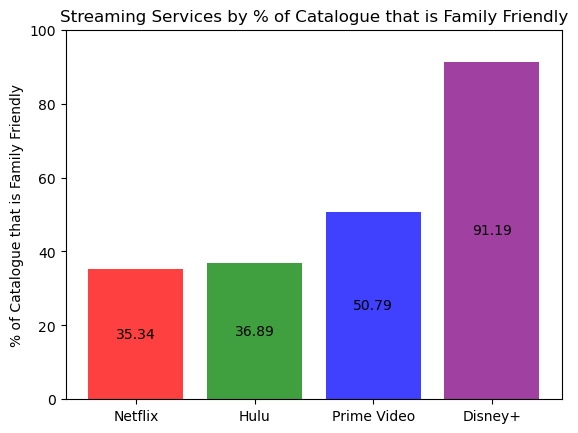

In [6]:
y_axis=[percent_family["Netflix"], percent_family['Hulu'], percent_family['Prime Video'], percent_family['Disney+']]
x_axis=np.arange(len(percent_family.keys()))
fig, ax=plt.subplots()
bar_chart=ax.bar(percent_family.keys(), y_axis, color=['r', 'g', 'b', 'purple'], alpha=.75)
ax.bar_label(bar_chart, label_type='center')
ax.set_title("Streaming Services by % of Catalogue that is Family Friendly")
ax.set_ylabel("% of Catalogue that is Family Friendly")
# plt.bar(x_axis, y_axis, align="center", color=['r', 'g', 'b', 'purple'])
# tick_locations=[value for value in x_axis]
# plt.xticks(tick_locations, percent_family.keys())
plt.ylim(0,100)
# plt.ylabel("% of Catalogue that is Family Friendly")
# plt.title("Streaming Services by % of Catalogue that is Family Friendly")
plt.savefig("Family_friendly_bar1.png")
# plt.show()

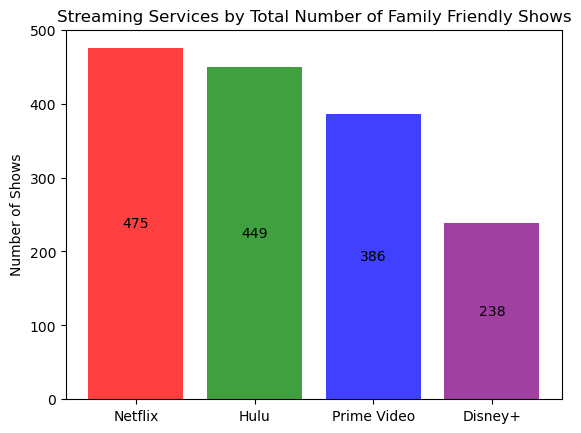

In [7]:
fig1, ax1=plt.subplots()
bar_chart=ax1.bar(show_count.keys(), show_count.values(), color=['r', 'g', 'b', 'purple'], alpha=.75)
ax1.bar_label(bar_chart, label_type='center')
ax1.set_title("Streaming Services by Total Number of Family Friendly Shows")
ax1.set_ylabel("Number of Shows")

# x_axis=np.arange(len(show_count.keys()))
# plt.bar(x_axis, show_count.values(), align="center", color=['r', 'g', 'b', 'purple'])
# tick_locations=[value for value in x_axis]
# plt.xticks(tick_locations, show_count.keys())
# plt.title("Streaming Services by Total Number of Family Friendly Shows")
plt.ylim(0,500)
# plt.ylabel("Number of Shows")
plt.savefig("Family_friendly_bar2.png")
# plt.show()